# Understanding Keras Syntax with Fake dataset

In [1]:
# for data manipulation & visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Fake Dataset

In [2]:
# load DF
df = pd.read_csv(r"D:\ML\Deep Learning_Practical\Data\fake_reg.csv")

In [3]:
# show DF's top few rows
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


### GOAL
Predict **`price`** based on **`feature1`** & **`feature2`**.\
_i.e.**Regression** (Supervised learning) problem_

## Exploring the Dataset

<Figure size 1980x1540 with 0 Axes>

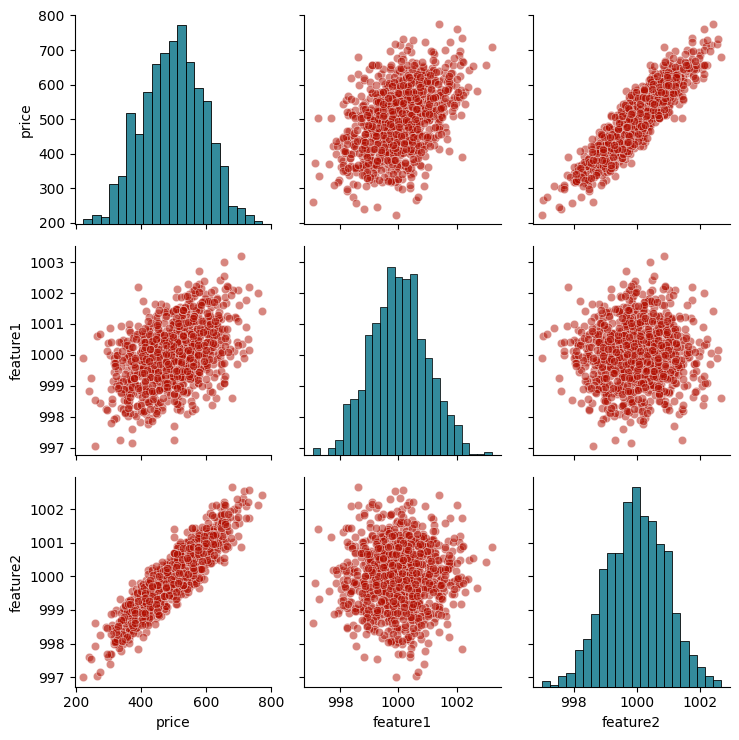

In [4]:
# pairplot
plt.figure(figsize=(9,7), dpi=220)
sns.pairplot(data=df,
             plot_kws={"color":"#B10E00", "alpha":0.5},
             diag_kws={"color":"#006E84", "alpha":0.8})

plt.tight_layout();

### Observations
1. **`feature2`** has **high correlation** with **`price`**
2. **`feature2`** the **correlation is less obvious** with **`price`**
---

## Pre-processing Data

In [6]:
# for creating training set & test set

from sklearn.model_selection import train_test_split

### NOTE

>**TensorFlow** expects input data to be **`Numpy Arrays`**.\
Need to convert Pandas DF into Numpy Array.

In [7]:
# input features
X = df.drop(columns="price", axis=1)
# target variable
y = df["price"]

# convert into Numpy array
X = np.array(X)
y = np.array(y)

In [8]:
# training set (70%) & test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

In [9]:
print(f"Shape of Original Dataset: {X.shape}")
print(f"Shape of Training Dataset: {X_train.shape}")
print(f"Shape of Training Dataset: {X_test.shape}")

Shape of Original Dataset: (1000, 2)
Shape of Training Dataset: (700, 2)
Shape of Training Dataset: (300, 2)


### Feature scaling

In [10]:
# for normalizing & scaling dataset

from sklearn.preprocessing import MinMaxScaler

### Min-Max Scaling
>Scale each datapoint to **range between `0 and 1`**

In [11]:
# instantiate scaler object
mm_scaler = MinMaxScaler()

In [12]:
# fit scaler to training data
mm_scaler.fit(X_train)

MinMaxScaler()

In [13]:
# transform both training set & test set

X_train_scaled = mm_scaler.transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

In [14]:
# check scaled data

print(f"TRAINING SET\nMin. value = {X_train_scaled.min()}, Max. value = {X_train_scaled.max()}")
print(f"\nTEST SET\nMin. value = {X_test_scaled.min()}, Max. value = {X_test_scaled.max()}")

TRAINING SET
Min. value = 0.0, Max. value = 1.0

TEST SET
Min. value = -0.007074224487610081, Max. value = 1.0870648884651928


## Creating a Neural Network Model

In [15]:
# import keras and relevant libraries

# for creating sequential dense NN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Dense NN Sequential Model

### Model Architecture
>**`1 Input Layer`** with **`4 Neurons`** -> **Rectified Linear** activation\
**`2 Hidden Layers`** each with **`4 Neurons`** -> **Rectified Linear** activation\
**`1 Output Layer`** with **`1 Neuron`** => **Linear** activation

In [16]:
# list of dense layers
dense_layers = [
    Dense(units=4, activation="relu", name="layer1"),
    Dense(units=4, activation="relu", name="layer2"),
    Dense(units=4, activation="relu", name="layer3"),
    Dense(units=1, activation="linear", name="layer4")
]

In [17]:
# create sequential model
model = Sequential(dense_layers)

**Alternative implementation**

```python
# instantiate Sequential model
model = Sequential()

# add each layer separately
model.add(Dense(units=4, activation="relu", name="layer1"))
model.add(Dense(units=2, activation="relu", name="layer2"))
model.add(Dense(units=4, activation="relu", name="layer3"))
model.add(Dense(units=1, activation="linear", name="layer4"))

```

**Advantage**\
Can quickly **turn-off a layer** if want to experiment by simply commenting out a layer.

### Compiling the Model
Training the model.

#### Loss functions
1. **`"categorical_crossentropy"`** -> for **Multi-class classification** problem
---
2. **`"binary_crossentropy"`** -> for **Binary classification** problem
---
3. **`"mse"`** -> for **Mean Squared Error Regression** problem

#### batch_size
Keras **splits dataset** into **batches** for faster & efficient training.\
**`batch_size = No. of training examples per batch`**

#### epochs
Total no. of times Keras performs **`Forward & Backward propagation`** on the entire training set to **update the `weights` & `biases`**.

In [18]:
# compile the sequential dense NN model
model.compile(optimizer="rmsprop",
             loss="mse")

In [19]:
# fit (training the model) model to trainin set
# 1 epoch = Goingh through the dataset (training set) one time
# epochs=250 -> Model goes through training set 250 times and performs training
model.fit(x=X_train_scaled, y=y_train,
          epochs=250, verbose=1)

Epoch 1/250

22/22 [==============================] - 1s 2ms/step - loss: 257393.2344
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 257259.5000
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 257142.3750
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 257020.1562
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256890.9062
Epoch 6/250
22/22 [==============================] - 0s 1ms/step - loss: 256751.7188
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 256604.2969
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256449.2188
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256284.9844
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 256109.9375
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255920.1094
Epoch 12/250
22/22 [==============================] - 0s 1ms/s

Epoch 93/250
22/22 [==============================] - 0s 973us/step - loss: 29014.7910
Epoch 94/250
22/22 [==============================] - 0s 997us/step - loss: 24923.1777
Epoch 95/250
22/22 [==============================] - 0s 987us/step - loss: 21115.0586
Epoch 96/250
22/22 [==============================] - 0s 985us/step - loss: 17567.5137
Epoch 97/250
22/22 [==============================] - 0s 983us/step - loss: 14344.6230
Epoch 98/250
22/22 [==============================] - 0s 980us/step - loss: 11428.2012
Epoch 99/250
22/22 [==============================] - 0s 981us/step - loss: 8834.8701
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 6615.6470
Epoch 101/250
22/22 [==============================] - 0s 990us/step - loss: 4864.5688
Epoch 102/250
22/22 [==============================] - 0s 997us/step - loss: 3506.6975
Epoch 103/250
22/22 [==============================] - 0s 985us/step - loss: 2599.4546
Epoch 104/250
22/22 [=========================

22/22 [==============================] - 0s 967us/step - loss: 164.9034
Epoch 189/250
22/22 [==============================] - 0s 1ms/step - loss: 155.1107
Epoch 190/250
22/22 [==============================] - 0s 1ms/step - loss: 144.8425
Epoch 191/250
22/22 [==============================] - 0s 951us/step - loss: 135.7216
Epoch 192/250
22/22 [==============================] - 0s 1ms/step - loss: 127.1957
Epoch 193/250
22/22 [==============================] - 0s 997us/step - loss: 119.1218
Epoch 194/250
22/22 [==============================] - 0s 949us/step - loss: 112.3135
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 105.7215
Epoch 196/250
22/22 [==============================] - 0s 949us/step - loss: 98.9951
Epoch 197/250
22/22 [==============================] - 0s 970us/step - loss: 92.5533
Epoch 198/250
22/22 [==============================] - 0s 997us/step - loss: 86.7669
Epoch 199/250
22/22 [==============================] - 0s 959us/step - loss: 81

### Observation
**`Loss`** keeps reducing as total passes (**`epochs`**) increases.

#### NOTE
**`model.history.history`** returns a python **dict of losses** which can be converted into a Pandas DF an plotted.

In [20]:
# loss history
loss_dict = model.history.history

In [21]:
# datafram of loss vs epoch
loss_df = pd.DataFrame(loss_dict)

In [22]:
# loss & epoch df
loss_df

,loss
0,257393.234375
1,257259.500000
2,257142.375000
3,257020.156250
4,256890.906250
...,...
245,24.096777
246,23.807266
247,24.336292
248,23.860014


### Visualizing Loss over each Epoch (_training passes_)

In [23]:
xVals = range(1, 251)
yVals = np.array(loss_df["loss"])

fig, ax = plt.subplots(figsize=(5,4), dpi=2220)

ax.plot(xVals, yVals, linestyle="-",
       color="#850000", label="MSE Loss")

ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

ax.grid(linestyle=":", linewidth=0.5,
       color="black", alpha=0.5)
# ax.axvline(x=50)

ax.legend()

fig.suptitle("Mean Squared Error (MSE) Loss\nv/s\nTraining Epoch")

fig.tight_layout();

## Model Evaluation

Evaluating performance after NN underwent training.\
Evaluation is done on **`Test set`** using the\
**`model.evaluate()`** method of Keras.

In [24]:
# evaluate the Sequential Dense NN
# verbose=0 -> do not print evaluation steps as done during training
test_evaluation = model.evaluate(x=X_test_scaled, y=y_test, verbose=0)
train_evaluation = model.evaluate(x=X_train_scaled, y=y_train, verbose=0)

In [25]:
print(f"Evaluation Score (MSE) after training for 250 Epochs\n\nPerformance on Training set = {train_evaluation}\nPerformance on Test set = {test_evaluation}")

Evaluation Score (MSE) after training for 250 Epochs

Performance on Training set = 25.572673797607422
Performance on Test set = 25.554838180541992


## Predict using trained NN Model

In [26]:
# make predictions on test set

test_predictions = model.predict(X_test_scaled)

10/10 [==============================] - 0s 1ms/step


In [27]:
print(f"Predictions on Test set for first 5 examples:\n\n{test_predictions[0:5]}")

Predictions on Test set for first 5 examples:

[[512.14935]
 [548.02356]
 [511.5969 ]
 [516.29333]
 [548.8038 ]]


In [28]:
# compare predictions and true prices by plotting

# convert into dataframe for plotting

# series needs a 1D array
# hence reshape into (300,)
# 300 = no. of examples in test set (= no. of predictions)
test_predictions_series = pd.Series(test_predictions.reshape(300,))

# DF with only True y values for test set
predictions_df = pd.DataFrame(y_test,
                              columns=["Test True y"])

# concatenate test_predictions_series with the DF
predictions_df = pd.concat([predictions_df, test_predictions_series],
                          axis=1)

# set column names for final concatenated DF
predictions_df.columns = ["Test True y", "Test Predicted y"]

In [29]:
# final dataframe
predictions_df

,Test True y,Test Predicted y
0,518.356144,512.149353
1,551.650100,548.023560
2,511.366708,511.596893
3,518.127883,516.293335
4,547.624043,548.803772
...,...,...
295,429.915413,427.478119
296,403.315576,402.634338
297,576.738425,576.002747
298,604.110661,611.548584


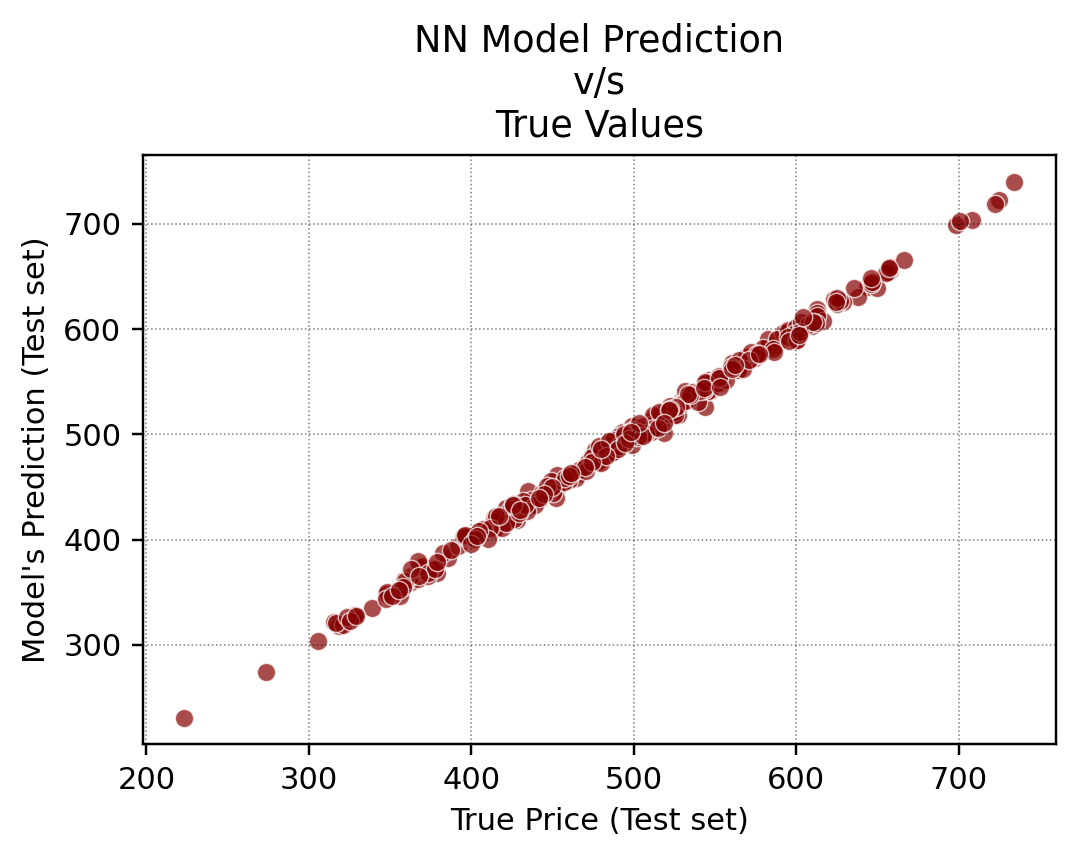

In [57]:
# create scatter plot

plt.figure(figsize=(5,4), dpi=220)

sns.scatterplot(x="Test True y", y="Test Predicted y",
               data=predictions_df, alpha=0.7, color="#850000")

plt.grid(linestyle=":", linewidth=0.5, color="black", alpha=0.5)

plt.xlabel("True Price (Test set)")
plt.ylabel("Model's Prediction (Test set)")

plt.title("NN Model Prediction\nv/s\nTrue Values")

plt.tight_layout();

### Observation
Plot shows a **~straight line** indicating **`model predictions`** are **very close** to **`actual prices`** for the **test set**.\
Hence, NN model is **performing well** on previously unseen data and likely to **generalize well** for real-world applications.
>_**Ideal** (perfect) scenario: Plot would be a **perfect straight line** with both predictions & true values overlapping_.

## Evaluating NN Model's Performance
Metrics to be used (_Regression problem_):
1. **`Mean Absolute Error` (MAE)**
2. **`Mean Squared Error` (MSE)**
3. **`Root Mean Squared Error` (RMSE)**
    - if RMSE >> MAE, indicates NN model performed relatively poorly on few outlier datapoints

In [31]:
# evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [32]:
# mae
mae = mean_absolute_error(y_true=predictions_df["Test True y"],
                          y_pred=predictions_df["Test Predicted y"])

In [35]:
# mse
mse = mean_squared_error(y_true=predictions_df["Test True y"],
                         y_pred=predictions_df["Test Predicted y"])

# root mean squared error
rmse = np.sqrt(mse)

In [36]:
print(f"Mean Absolute Error in predicted price = ${np.round(mae, decimals=4)}")
print(f"Root Mean Squared Error in predicted price = ${np.round(rmse, decimals=4)}")

Mean Absolute Error in predicted price = $4.0767
Root Mean Squared Error in predicted price = $5.0552


### Putting things into perspective

In [37]:
# original dataset
df.describe()

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [40]:
print(f"Avegrage price in original dataset = ${df['price'].mean()}")

print(f"Mean Absolute Error in predicted price = ${np.round(mae, decimals=4)}")
print(f"Root Mean Squared Error in predicted price = ${np.round(rmse, decimals=4)}")

Avegrage price in original dataset = $498.6730289967182
Mean Absolute Error in predicted price = $4.0767
Root Mean Squared Error in predicted price = $5.0552


### Observation

>Both **`MAE`** and **`MSE`** is **negligible** compared to **`True Average price`**.

This indicates that **NN model is performing well on previously unseen data** and is likely to **generalize** into real-world cases.

# Predicting on brand new data

In [58]:
# new data (2D array with feature1 and feature2)
new = np.array([
    [998, 1000]
])

In [59]:
# scale the new data using originally learnt scaler
new_scaled = mm_scaler.transform(new)

In [60]:
# predictions on scaled new features
predict_new = model.predict(new_scaled)

1/1 [==============================] - 0s 22ms/step


In [67]:
print(f"Price Prediction for new data = ${np.round(float(predict_new[0][0]), decimals=4)}")

Price Prediction for new data = $418.6007


# Saving the Trained NN Model (_future deployment_)

**NOTE**\
Should save model using **`.keras`** extension.\
**`.h5`** has been deprecated.

In [68]:
# for saving the trained NN model
from tensorflow.keras.models import load_model

In [70]:
# save model
model.save(r"D:\ML\Deep Learning_Practical\TF & Keras\Models\fake_data_model.keras")

In [72]:
# # loading model for later use

# load_trained_model = load_model(r"D:\ML\Deep Learning_Practical\TF & Keras\Models\fake_data_model.keras")